In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import  seaborn as sns

# Read the CSV file

In [81]:
label=['class','mail','a','b','c']
mail=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding="ISO-8859-1",names=label)
mail.head()

,class,mail,a,b,c
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [82]:
mail.head(6)

,class,mail,a,b,c
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
5,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [83]:
mail.shape

(5573, 5)

# split the data in columns

In [84]:
mail.columns

Index(['class', 'mail', 'a', 'b', 'c'], dtype='object')

In [85]:
mail=mail.iloc[1:,:2]
mail.head()

,class,mail
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."


# read the class count of ham and spam

In [86]:
mail[["class"]]

,class
1,ham
2,ham
3,spam
4,ham
5,ham
...,...
5568,spam
5569,ham
5570,ham
5571,ham


In [87]:
f1 = mail["class"] =="ham"
f1

1        True
2        True
3       False
4        True
5        True
        ...  
5568    False
5569     True
5570     True
5571     True
5572     True
Name: class, Length: 5572, dtype: bool

# remove the duplicates from the data

In [88]:
mail.drop_duplicates(inplace = True)
mail.shape

(5169, 2)

In [89]:
mail.isnull().sum()

class    0
mail     0
dtype: int64

# assign = 0 & 1 for spam and ham

In [90]:
mail.loc[mail['class']=='spam','class',]=0
mail.loc[mail['class']=='ham','class',]=1
mail.head()

,class,mail
1,1,"Go until jurong point, crazy.. Available only ..."
2,1,Ok lar... Joking wif u oni...
3,0,Free entry in 2 a wkly comp to win FA Cup fina...
4,1,U dun say so early hor... U c already then say...
5,1,"Nah I don't think he goes to usf, he lives aro..."


# divide the data for the train and test

In [98]:
x=mail['mail']
y=mail['class']

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=2)

In [100]:
ham=(mail['class']==1).sum()
spam=len(mail)-ham
spam,ham

(653, 4516)

<BarContainer object of 2 artists>

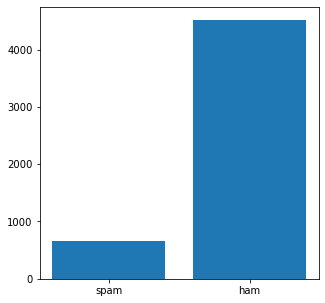

In [97]:
value=[spam,ham]
name=['spam','ham']
plt.figure(figsize=(5,5))
plt.bar(name,value)

In [96]:
extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
xtrainfeatures=extraction.fit_transform(xtrain)
xtestfeatures=extraction.transform(xtest)
ytrain=ytrain.astype('int')
ytest=ytest.astype('int')

In [94]:
svm=LinearSVC()
svm.fit(xtrainfeatures,ytrain)

LinearSVC()

In [95]:
prediction=svm.predict(xtestfeatures)
accuracy=accuracy_score(ytest,prediction)
accuracy

0.9806576402321083